In [1]:
import pandas as pd
final_demo_df = pd.read_csv("df_final_demo.txt")

In [2]:
age_group_counts = final_demo_df['clnt_age'].value_counts().sort_index()

In [3]:
final_experiment_clients_df = pd.read_csv("df_final_experiment_clients.txt")

In [4]:
final_web_data_pt_1_df = pd.read_csv("df_final_web_data_pt_1.txt")

In [5]:
final_web_data_pt_2_df = pd.read_csv("df_final_web_data_pt_2.txt")

In [6]:
df_digital_footprints = pd.concat([final_web_data_pt_1_df,final_web_data_pt_2_df ], axis=0)


In [7]:
df_merged_1= pd.merge(final_demo_df, df_digital_footprints, how="outer", on=["client_id"])


In [8]:
final_df= pd.merge(df_merged_1, final_experiment_clients_df, how="outer", on=["client_id"])


In [9]:
# Cleaned df after dropping null values
cleaned_df=final_df.dropna(subset=['Variation'])
cleaned_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
12,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
13,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
14,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
15,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
16,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755376,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test
755377,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,Test
755378,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,Test
755391,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,145538019_54444341400,472154369_16714624241_585315,step_1,2017-05-16 16:46:11,Test


In [10]:
# Group all clients by Variation (Control/Test)
client_count_by_test = cleaned_df.groupby('Variation')['client_id'].count()
client_count_by_test

Variation
Control    143462
Test       177847
Name: client_id, dtype: int64

In [11]:
# Age central measures for all clients
mean_age = cleaned_df['clnt_age'].mean().round(1)
median_age = cleaned_df['clnt_age'].median()
mode_age = cleaned_df['clnt_age'].mode()[0]
mean_age, median_age, mode_age

(48.6, 50.0, 58.5)

In [12]:
import pandas as pd
import scipy.stats as st
import numpy as np


In [13]:
#Set the hypothesis about client age  whether the average age of clients engaging
# with the new process is the same as those engaging with the old process

#H0: mu Control = mu Test
#H1: mu Control != mu Test

In [14]:
# Choose the significance level
alpha = 0.05

In [15]:
# Defining Control and Test Groups for Client Age
control_1 = cleaned_df[cleaned_df["Variation"]=="Control"]["clnt_age"]
test_1 = cleaned_df[cleaned_df["Variation"]=="Test"]["clnt_age"]

In [16]:
# Cleaning Control group of nan values
control_1.dropna(inplace = True)

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/3427762023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_1.dropna(inplace = True)


In [17]:
# Cleaning Test group of nan values
test_1.dropna(inplace = True)

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/2819449625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.dropna(inplace = True)


In [18]:
st.ttest_ind(control_1,test_1,alternative = 'two-sided')
# the p_value is lower than our significance level, we can reject the null hypothesis 

TtestResult(statistic=-7.926400435419626, pvalue=2.263054043650787e-15, df=321193.0)

In [19]:
# Defining Control and Test Groups for Client Tenure
control_2 = cleaned_df[cleaned_df["Variation"]=="Control"]["clnt_tenure_yr"]
test_2 = cleaned_df[cleaned_df["Variation"]=="Test"]["clnt_tenure_yr"]

In [20]:
control_2.dropna(inplace = True)
test_2.dropna(inplace = True)

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/3511551151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_2.dropna(inplace = True)
/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/3511551151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2.dropna(inplace = True)


In [21]:
st.ttest_ind(control_2,test_2, alternative = 'two-sided' )
# the p_value is higher than our significance level, we can not reject the null hypothesis 

TtestResult(statistic=-0.33402557786961984, pvalue=0.7383604757924893, df=321205.0)

In [22]:
# Count of tenure years by age group
age_group = cleaned_df.groupby('clnt_age')
client_count_by_age_tenure = cleaned_df.groupby('clnt_age')['clnt_tenure_yr'].count()
client_count_by_age_tenure

clnt_age
17.0     19
17.5    412
18.0    317
18.5    709
19.0    458
       ... 
93.5     32
94.0     25
94.5      5
95.5      6
96.0     10
Name: clnt_tenure_yr, Length: 158, dtype: int64

In [23]:
# Average length of tenure (years) by age group
avg_tenure_by_age = cleaned_df.groupby('clnt_age')['clnt_tenure_yr'].mean().round(1)
avg_tenure_by_age

clnt_age
17.0     8.7
17.5     7.5
18.0    10.1
18.5     9.0
19.0     8.9
        ... 
93.5    20.5
94.0     7.4
94.5    15.0
95.5    12.0
96.0    16.8
Name: clnt_tenure_yr, Length: 158, dtype: float64

In [24]:
# Age of the client with the longest tenure
client_count_by_age = cleaned_df.groupby('clnt_age')['clnt_tenure_yr'].max()
age_with_max_tenure = client_count_by_age .idxmax()
age_with_max_tenure

42.5

In [25]:
# Average tenure in years by all age groups
cleaned_df['clnt_tenure_yr'].mean().round(1)

12.2

In [26]:
# Longest tenure in years by all age groups
cleaned_df['clnt_tenure_yr'].max() # check for mistakes!

55.0

In [27]:
mean_age = cleaned_df.groupby(['Variation'])['clnt_age'].mean().round(2).reset_index
mean_age

<bound method Series.reset_index of Variation
Control    48.31
Test       48.75
Name: clnt_age, dtype: float64>

In [28]:
# Average tenure by Variation
avg_tenure_variation = cleaned_df.groupby(['Variation'])['clnt_tenure_yr'].mean().round(3).reset_index
avg_tenure_variation

<bound method Series.reset_index of Variation
Control    12.172
Test       12.180
Name: clnt_tenure_yr, dtype: float64>

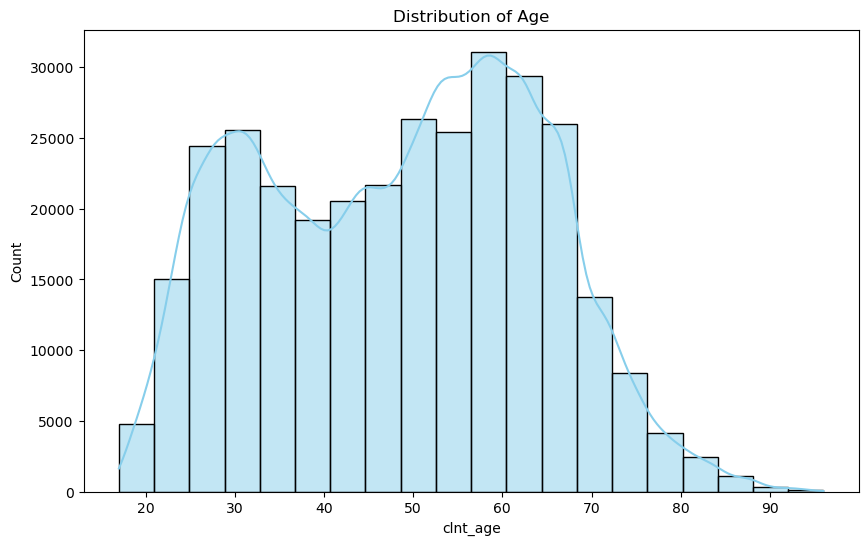

In [29]:
#  distribution of number of clients by age groups
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df['clnt_age'], bins=20, kde=True, color="skyblue")
plt.title('Distribution of Age')
plt.show()

In [30]:
# Client distribution by gender
cleaned_df['gendr'].value_counts()


gendr
U    108884
M    108013
F    104302
X         8
Name: count, dtype: int64

In [31]:
min_age = cleaned_df['clnt_age'].min()
max_age = cleaned_df['clnt_age'].max()
min_age, max_age

(17.0, 96.0)

In [32]:
standard_deviation = round(cleaned_df['clnt_age'].std(), 2)
standard_deviation

15.65

In [33]:
skewness_age = cleaned_df['clnt_age'].skew().round(1)
kurtosis_age = cleaned_df['clnt_age'].kurtosis().round(1)
skewness_age, kurtosis_age

(-0.0, -0.9)

In [34]:
cleaned_df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
visitor_id           object
visit_id             object
process_step         object
date_time            object
Variation            object
dtype: object

In [35]:
# Average account balance by Variation
avg_balance_account = cleaned_df.groupby(['Variation'])['bal'].mean().round(1).reset_index
avg_balance_account

<bound method Series.reset_index of Variation
Control    159398.6
Test       164477.4
Name: bal, dtype: float64>

In [36]:
# Defining Control and Test Groups for Account Balances
control_3 = cleaned_df[cleaned_df["Variation"]=="Control"]["bal"]
test_3 = cleaned_df[cleaned_df["Variation"]=="Test"]["bal"]

In [37]:
control_3.dropna(inplace = True)
test_3.dropna(inplace = True)

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/2735719742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_3.dropna(inplace = True)
/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/2735719742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_3.dropna(inplace = True)


In [38]:

st.ttest_ind(control_3,test_3,alternative = 'two-sided')
# the p_value is lower than our significance level, we can reject the null hypothesis 

TtestResult(statistic=-4.094688433036507, pvalue=4.228397982213412e-05, df=321205.0)

In [39]:
# Checking for outliers in balance accounts - YES
Q1 = cleaned_df['bal'].quantile(0.25)
Q3 = cleaned_df['bal'].quantile(0.75)
IQR = Q3 - Q1
    
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
outliers = cleaned_df[(cleaned_df['bal'] < lower_bound) | (cleaned_df['bal'] > upper_bound)]
outliers.shape

(36439, 14)

In [40]:
# Checking for outliers in tenure years - YES
Q1 = cleaned_df['clnt_tenure_yr'].quantile(0.25)
Q3 = cleaned_df['clnt_tenure_yr'].quantile(0.75)
IQR = Q3 - Q1
    
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
outliers = cleaned_df[(cleaned_df['clnt_tenure_yr'] < lower_bound) | (cleaned_df['clnt_tenure_yr'] > upper_bound)]
outliers.shape

(4214, 14)

In [41]:
# Checking for outliers- NONE
Q1 = cleaned_df['calls_6_mnth'].quantile(0.25)
Q3 = cleaned_df['calls_6_mnth'].quantile(0.75)
IQR = Q3 - Q1
    
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
outliers = cleaned_df[(cleaned_df['calls_6_mnth'] < lower_bound) | (cleaned_df['calls_6_mnth'] > upper_bound)]
outliers.shape

(0, 14)

In [42]:
# Checking for outliners - NONE
Q1 = cleaned_df['logons_6_mnth'].quantile(0.25)
Q3 = cleaned_df['logons_6_mnth'].quantile(0.75)
IQR = Q3 - Q1
    
 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound
outliers = cleaned_df[(cleaned_df['logons_6_mnth'] < lower_bound) | (cleaned_df['logons_6_mnth'] > upper_bound)]
outliers.shape

(0, 14)

In [43]:
# Mapping dictionary
mapping = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5 }
formatted_df = cleaned_df.copy()
formatted_df['process_step']= cleaned_df['process_step'].map(mapping)

formatted_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
12,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,5,2017-04-15 13:00:34,Test
13,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,4,2017-04-15 13:00:14,Test
14,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 12:58:35,Test
15,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:03,Test
16,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:57:56,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755376,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,3,2017-05-08 16:08:40,Test
755377,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,2,2017-05-08 16:08:30,Test
755378,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,834634258_21862004160,870243567_56915814033_814203,1,2017-05-08 16:08:25,Test
755391,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,145538019_54444341400,472154369_16714624241_585315,2,2017-05-16 16:46:11,Test


In [44]:
# Numerical values for correlaction matrix
df_numerical = formatted_df.drop(['client_id', 'clnt_tenure_mnth','gendr','visit_id', 'visitor_id','Variation', 'process_step', 'date_time'], axis=1)
df_numerical

,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
12,3.0,29.5,2.0,25454.66,2.0,6.0
13,3.0,29.5,2.0,25454.66,2.0,6.0
14,3.0,29.5,2.0,25454.66,2.0,6.0
15,3.0,29.5,2.0,25454.66,2.0,6.0
16,3.0,29.5,2.0,25454.66,2.0,6.0
...,...,...,...,...,...,...
755376,10.0,31.0,3.0,107059.74,6.0,9.0
755377,10.0,31.0,3.0,107059.74,6.0,9.0
755378,10.0,31.0,3.0,107059.74,6.0,9.0
755391,23.0,49.0,2.0,431887.61,1.0,4.0


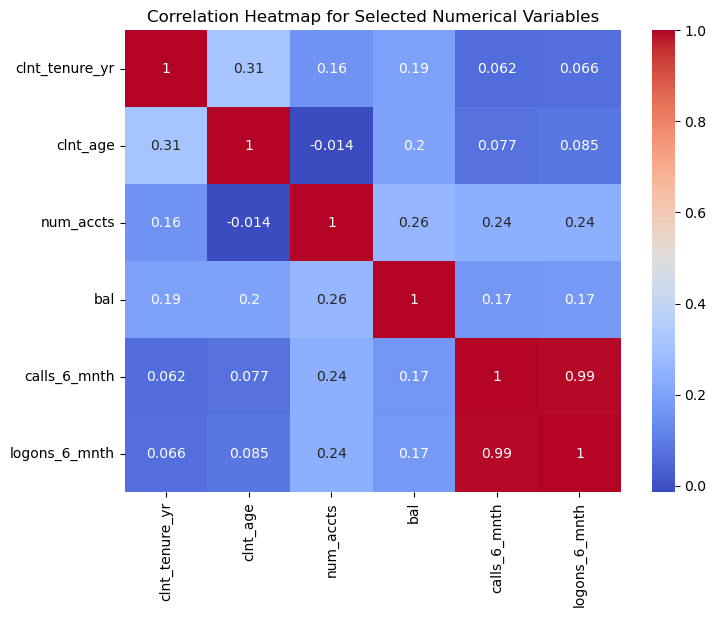

In [45]:
correlation_matrix = df_numerical.corr()
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [46]:
completion_stage_sorted = cleaned_df.drop(['clnt_tenure_mnth','gendr','visit_id', 'visitor_id','Variation', 'clnt_tenure_yr',	'clnt_age',	'num_accts', 'bal',	'calls_6_mnth', 	'logons_6_mnth', 'date_time'], axis=1)
completion_stage_sorted = cleaned_df.groupby('process_step')['client_id'].nunique()
completion_stage_sorted = completion_stage_sorted.sort_values(ascending=False)
completion_stage_sorted 

process_step
start      50076
step_1     44419
step_2     40908
step_3     38303
confirm    34121
Name: client_id, dtype: int64

/var/folders/tk/l3rys1j13d714cd0mx1y2mn00000gn/T/ipykernel_35609/2005847610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completion_stage_sorted.index, y=completion_stage_sorted.values, palette='Blues')


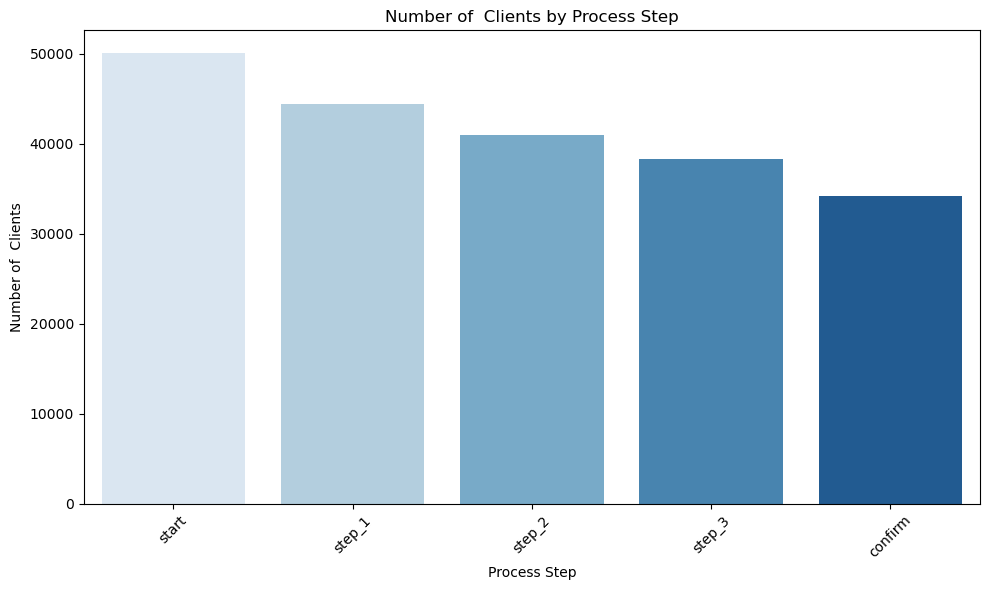

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=completion_stage_sorted.index, y=completion_stage_sorted.values, palette='Blues')
plt.title('Number of  Clients by Process Step')
plt.xlabel('Process Step')
plt.ylabel('Number of  Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Start Bounce Rate
# Number of visitors who left after the first step/Total visitors to the first step
start_bounce_rate = (completion_stage_sorted['start'] - completion_stage_sorted['step_1']) / completion_stage_sorted['start']*100
print ('Start bounce rate:', start_bounce_rate.round(1)
, '%')
 

Start bounce rate: 11.3 %


In [49]:
# First Step Bounce Rate
# Number of visitors who left after the first step/Total visitors to the first step
first_step_bounce_rate = (completion_stage_sorted['step_1'] - completion_stage_sorted['step_2']) / completion_stage_sorted['step_1']*100
first_step_bounce_rate.round(2)
print( 'First step bounce rate:', first_step_bounce_rate.round(1)
, '%')

First step bounce rate: 7.9 %


In [50]:
# Second Step Bounce Rate
# Number of visitors who left after the second step/Total visitors to the second step
second_step_bounce_rate = (completion_stage_sorted['step_2'] - completion_stage_sorted['step_3']) / completion_stage_sorted['step_2']*100
second_step_bounce_rate.round(2)
print( 'Second step bounce rate:', second_step_bounce_rate.round(1)
, '%')

Second step bounce rate: 6.4 %


In [51]:
# Third Step Bounce Rate
# Number of visitors who left after the third step/Total visitors to the third step
third_step_bounce_rate = (completion_stage_sorted['step_3'] - completion_stage_sorted['confirm']) / completion_stage_sorted['step_3']*100
third_step_bounce_rate.round(1)
print( 'Third step bounce rate:', third_step_bounce_rate.round(1), '%')

Third step bounce rate: 10.9 %


In [52]:
#Completion rate
started = cleaned_df[cleaned_df['process_step'] == 'start']['client_id'].nunique()
confirmed = cleaned_df[cleaned_df['process_step'] == 'confirm']['client_id'].nunique()

# Calculate the completion rate
completion_rate = (confirmed / started) * 100

# Display the completion rate
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 68.14%


In [53]:
total_counts = cleaned_df['process_step'].value_counts()
total_counts

process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

In [54]:
cleaned_df = cleaned_df.dropna()

In [55]:
cleaned_df.describe().round()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,321195.0,321195.0,321195.0,321195.0,321195.0,321195.0,321195.0,321195.0
mean,5009766.0,12.0,152.0,49.0,2.0,162214.0,3.0,6.0
std,2872653.0,7.0,83.0,16.0,1.0,349478.0,2.0,2.0
min,555.0,2.0,33.0,17.0,1.0,23789.0,0.0,3.0
25%,2514553.0,6.0,82.0,34.0,2.0,41059.0,1.0,4.0
50%,5051667.0,11.0,138.0,50.0,2.0,69242.0,3.0,6.0
75%,7468390.0,16.0,193.0,61.0,2.0,151493.0,6.0,9.0
max,9999832.0,55.0,669.0,96.0,7.0,16320040.0,6.0,9.0


In [56]:

step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

total_counts = cleaned_df['process_step'].value_counts()

error_counts = []

# Initialize previous step
previous_step = None

for step in cleaned_df['process_step']:
    if previous_step is not None:
        if step in step_order and previous_step in step_order:
            # Count an error if the current step is before the previous step in the order
            error_counts.append(int(step_order.index(step) < step_order.index(previous_step)))
        else:
            error_counts.append(0)  
    else:
        error_counts.append(0)  
    previous_step = step  # Update previous step

error_counts_series = pd.Series(error_counts)

# Group by the process steps, filtering out any steps that don't have errors
error_counts_grouped = error_counts_series.groupby(cleaned_df['process_step']).sum()

error_rates = (error_counts_grouped / total_counts) * 100

error_rates_df = error_rates.reset_index(name='error_rate')
print(error_rates_df)

  process_step  error_rate
0      confirm   25.292729
1        start   25.036284
2       step_1   25.060664
3       step_2   25.364524
4       step_3   25.294299


In [57]:
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

total_counts = cleaned_df['process_step'].value_counts()

error_counts = []

for idx, step in enumerate(cleaned_df['process_step']):
    if idx > 0: 
        previous_step = cleaned_df['process_step'].iloc[idx - 1]
        if step in step_order and previous_step in step_order:
            error_counts.append(int(step_order.index(step) < step_order.index(previous_step)))
        else:
            error_counts.append(0)  
    else:
        error_counts.append(0)  

error_counts_series = pd.Series(error_counts)

error_counts_grouped = error_counts_series.groupby(cleaned_df['process_step']).sum().fillna(0)

error_rates = (error_counts_grouped / total_counts) * 100

error_rates


process_step
confirm    25.292729
start      25.036284
step_1     25.060664
step_2     25.364524
step_3     25.294299
dtype: float64

In [58]:
# total frequency of each step for all clients
total_counts = cleaned_df['process_step'].value_counts()
total_counts

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64

In [59]:
total_counts.sum()

321195

In [60]:
# total frequency of each step total by control/test 
process_step_frequency_total = cleaned_df.groupby(['Variation'])['process_step'].value_counts()
process_step_frequency_total 

Variation  process_step
Control    start           47589
           step_1          29657
           step_2          25877
           step_3          22787
           confirm         17498
Test       start           56452
           step_1          38753
           step_2          30978
           step_3          25888
           confirm         25716
Name: count, dtype: int64

In [61]:
process_step_frequency_total.sum()

321195

In [62]:
# Unique frequency for each step for all clients
process_step_frequency_unique = cleaned_df.groupby('process_step')['client_id'].nunique()
process_step_frequency_unique.sort_values(ascending=False)

process_step
start      50063
step_1     44406
step_2     40896
step_3     38292
confirm    34110
Name: client_id, dtype: int64

In [63]:
process_step_frequency_unique.sum()

207767

In [64]:
# Unique frequency for each step for all clients by Control/Test 
process_step_variation = cleaned_df.groupby(['Variation','process_step'])['client_id'].nunique() 
process_step_sorted_variation = pd.DataFrame(process_step_variation).sort_values(by=['Variation','client_id'], ascending = False)
process_step_sorted_variation

client_id
Variation process_step           
Test      start             26672
          step_1            24260
          step_2            22252
          step_3            20876
          confirm           18682
Control   start             23391
          step_1            20146
          step_2            18644
          step_3            17416
          confirm           15428

In [65]:
process_step_sorted_variation.sum()

client_id    207767
dtype: int64

In [66]:
# unique frequency by client by control/test as % of total frequency
horizontal_concat = pd.concat([process_step_frequency_total ,process_step_sorted_variation ], axis=1)
horizontal_concat['unique_frequency as % total'] = horizontal_concat['client_id']/horizontal_concat['count']
horizontal_concat.fillna(0).round(2)

count  client_id  unique_frequency as % total
Variation process_step                                               
Control   start         47589      23391                         0.49
          step_1        29657      20146                         0.68
          step_2        25877      18644                         0.72
          step_3        22787      17416                         0.76
          confirm       17498      15428                         0.88
Test      start         56452      26672                         0.47
          step_1        38753      24260                         0.63
          step_2        30978      22252                         0.72
          step_3        25888      20876                         0.81
          confirm       25716      18682                         0.73

In [67]:
horizontal_concat['unique_frequency as % total'] = horizontal_concat['client_id']/horizontal_concat['count']

In [68]:
process_step_sorted_variation['Drop_out'] = process_step_sorted_variation.groupby('Variation')['client_id'].diff()*-1


In [69]:
process_step_sorted_variation['Percentage_drop_out, %'] = process_step_sorted_variation['Drop_out']  / process_step_sorted_variation['client_id'].shift(1).round(2)* 100
process_step_sorted_variation.fillna(0).round(2)


client_id  Drop_out  Percentage_drop_out, %
Variation process_step                                             
Test      start             26672       0.0                    0.00
          step_1            24260    2412.0                    9.04
          step_2            22252    2008.0                    8.28
          step_3            20876    1376.0                    6.18
          confirm           18682    2194.0                   10.51
Control   start             23391       0.0                    0.00
          step_1            20146    3245.0                   13.87
          step_2            18644    1502.0                    7.46
          step_3            17416    1228.0                    6.59
          confirm           15428    1988.0                   11.41